In [ ]:
!pip install scikit-learn

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopandas import datasets, GeoDataFrame, read_file
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<Axes: >

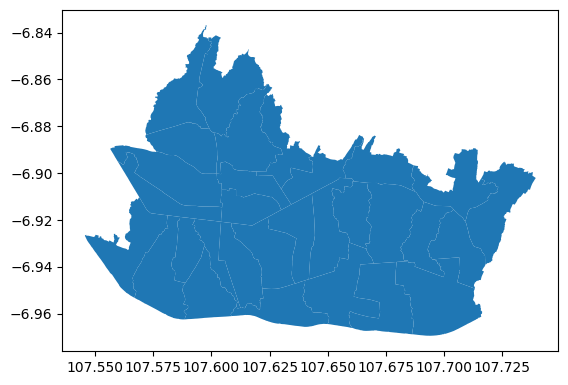

In [ ]:
url = "Bandung.geojson"
file = open(url)
kab = gpd.read_file(file)
kab.plot()

In [ ]:
df=pd.read_csv('TBC.csv')
df

,Kecamatan,Jumlah Kasus Baru TB BTA +,Jumlah Kasus TB Anak
0,Andir,196,140
1,Antapani,225,135
2,Arcamanik,92,76
3,Astana Anyar,336,260
4,Babakan Ciparay,495,309
5,Bandung Kidul,210,87
6,Bandung Kulon,279,225
7,Bandung Wetan,72,26
8,Batununggal,360,198
9,Bojongloa Kaler,498,381


In [ ]:
kab2 = kab.merge(df,on='Kecamatan')
kab2

,KODE_KEC,Kecamatan,geometry,Jumlah Kasus Baru TB BTA +,Jumlah Kasus TB Anak
0,32.73.28,Panyileukan,"MULTIPOLYGON Z (((107.71772 -6.93613 0.00000, ...",68,42
1,32.73.29,Cinambo,"MULTIPOLYGON Z (((107.69302 -6.93288 0.00000, ...",21,16
2,32.73.26,Ujungberung,"MULTIPOLYGON Z (((107.70843 -6.91962 0.00000, ...",184,90
3,32.73.27,Gedebage,"MULTIPOLYGON Z (((107.71353 -6.95572 0.00000, ...",72,52
4,32.73.30,Mandalajati,"MULTIPOLYGON Z (((107.68682 -6.89667 0.00000, ...",290,160
5,32.73.02,Coblong,"MULTIPOLYGON Z (((107.63051 -6.89210 0.00000, ...",488,212
6,32.73.03,Babakan Ciparay,"MULTIPOLYGON Z (((107.58921 -6.96030 0.00000, ...",495,309
7,32.73.01,Sukasari,"MULTIPOLYGON Z (((107.57875 -6.88158 0.00000, ...",272,196
8,32.73.06,Cicendo,"MULTIPOLYGON Z (((107.59799 -6.91432 0.00000, ...",134,90
9,32.73.07,Sukajadi,"MULTIPOLYGON Z (((107.59634 -6.88098 0.00000, ...",300,186


In [ ]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]

    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k, n_init=10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    #Generate the elbow plot
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Ineretia')
    plt.grid(True)
    plt.show

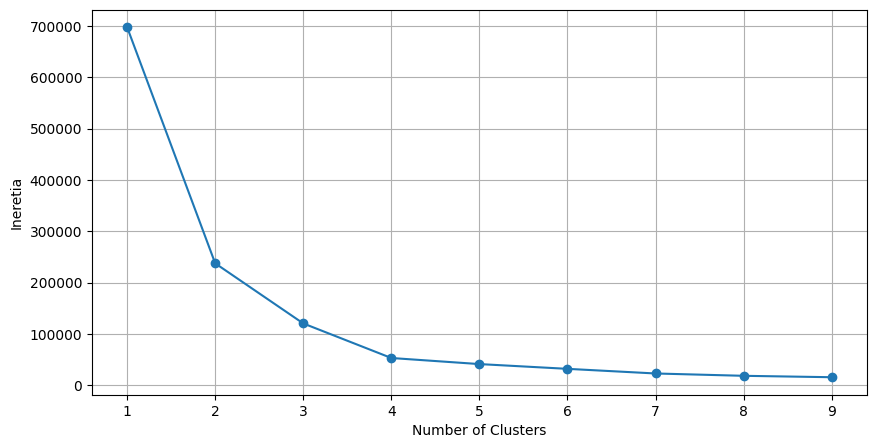

In [ ]:
optimise_k_means(df[['Jumlah Kasus Baru TB BTA +','Jumlah Kasus TB Anak']],10)

In [ ]:
# Buat objek KMeans dan atur nilai n_init secara eksplisit
kmeans = KMeans(n_clusters=3, n_init=10)

In [ ]:
kmeans.fit(df[['Jumlah Kasus Baru TB BTA +','Jumlah Kasus TB Anak']])

KMeans(n_clusters=3, n_init=10)

In [ ]:
df['kmeans_3']=kmeans.labels_
df

,Kecamatan,Jumlah Kasus Baru TB BTA +,Jumlah Kasus TB Anak,kmeans_3
0,Andir,196,140,1
1,Antapani,225,135,1
2,Arcamanik,92,76,2
3,Astana Anyar,336,260,0
4,Babakan Ciparay,495,309,0
5,Bandung Kidul,210,87,1
6,Bandung Kulon,279,225,1
7,Bandung Wetan,72,26,2
8,Batununggal,360,198,0
9,Bojongloa Kaler,498,381,0


In [ ]:
# Display columns in kab2
print(kab2.columns)

# Display the first few rows of kab2 to inspect its structure
print(kab2.head())

# Display columns in df
print(df.columns)


Index(['KODE_KEC', 'Kecamatan', 'geometry', 'Jumlah Kasus Baru TB BTA +',
       'Jumlah Kasus TB Anak'],
      dtype='object')
   KODE_KEC    Kecamatan                                           geometry  \
0  32.73.28  Panyileukan  MULTIPOLYGON Z (((107.71772 -6.93613 0.00000, ...   
1  32.73.29      Cinambo  MULTIPOLYGON Z (((107.69302 -6.93288 0.00000, ...   
2  32.73.26  Ujungberung  MULTIPOLYGON Z (((107.70843 -6.91962 0.00000, ...   
3  32.73.27     Gedebage  MULTIPOLYGON Z (((107.71353 -6.95572 0.00000, ...   
4  32.73.30  Mandalajati  MULTIPOLYGON Z (((107.68682 -6.89667 0.00000, ...   

   Jumlah Kasus Baru TB BTA +  Jumlah Kasus TB Anak  
0                          68                    42  
1                          21                    16  
2                         184                    90  
3                          72                    52  
4                         290                   160  
Index(['Kecamatan', 'Jumlah Kasus Baru TB BTA +', 'Jumlah Kasus TB Anak',

In [ ]:
# Display unique values in 'Kecamatan' column in kab2
print(kab2['Kecamatan'].unique())

# Display unique values in 'Kecamatan' column in df
print(df['Kecamatan'].unique())


['Panyileukan' 'Cinambo' 'Ujungberung' 'Gedebage' 'Mandalajati' 'Coblong'
 'Babakan Ciparay' 'Sukasari' 'Cicendo' 'Sukajadi' 'Bojongloa Kaler'
 'Andir' 'Cidadap' 'Bandung Wetan' 'Astana Anyar' 'Lengkong'
 'Cibeunying Kidul' 'Regol' 'Batununggal' 'Bojongloa Kidul'
 'Cibeunying Kaler' 'Bandung Kulon' 'Kiaracondong' 'Sumur Bandung'
 'Antapani' 'Bandung Kidul' 'Arcamanik' 'Cibiru' 'Buahbatu' 'Rancasari']
['Andir' 'Antapani' 'Arcamanik' 'Astana Anyar' 'Babakan Ciparay'
 'Bandung Kidul' 'Bandung Kulon' 'Bandung Wetan' 'Batununggal'
 'Bojongloa Kaler' 'Bojongloa Kidul' 'Buahbatu' 'Cibeunying Kaler'
 'Cibeunying Kidul' 'Cibiru' 'Cicendo' 'Cidadap' 'Cinambo' 'Coblong'
 'Gedebage' 'Kiaracondong' 'Lengkong' 'Mandalajati' 'Panyileukan'
 'Rancasari' 'Regol' 'Sukajadi' 'Sukasari' 'Sumur Bandung' 'Ujungberung']


In [ ]:

df['Kecamatan'] = df['Kecamatan'].str.strip()


In [ ]:
# Merge the DataFrames
kab2 = kab.merge(df, on='Kecamatan')


In [ ]:
# Display columns in the merged DataFrame (kab2)
print(kab2.columns)


Index(['KODE_KEC', 'Kecamatan', 'geometry', 'Jumlah Kasus Baru TB BTA +',
       'Jumlah Kasus TB Anak', 'kmeans_3'],
      dtype='object')


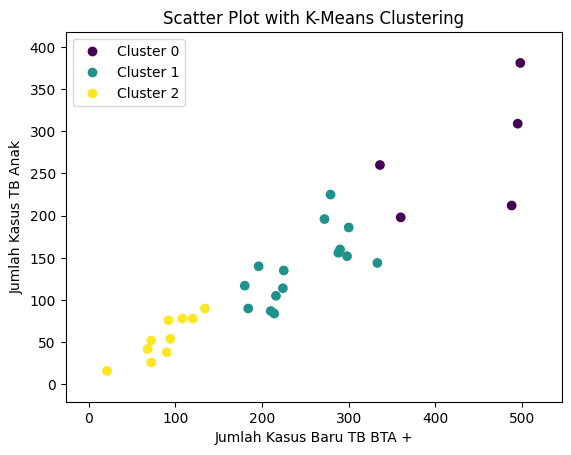

In [ ]:
import matplotlib.pyplot as plt

# Hitung nilai minimum dan maksimum
min_value_Jumlah_Kasus_Baru_TB_BTA = df['Jumlah Kasus Baru TB BTA +'].min()
max_value_Jumlah_Kasus_Baru_TB_BTA = df['Jumlah Kasus Baru TB BTA +'].max()

min_value_Jumlah_Kasus_TB_Anak = df['Jumlah Kasus TB Anak'].min()
max_value_Jumlah_Kasus_TB_Anak = df['Jumlah Kasus TB Anak'].max()

# batasan plot
xlim_min = min_value_Jumlah_Kasus_Baru_TB_BTA - 0.1 * (max_value_Jumlah_Kasus_Baru_TB_BTA - min_value_Jumlah_Kasus_Baru_TB_BTA)
xlim_max = max_value_Jumlah_Kasus_Baru_TB_BTA + 0.1 * (max_value_Jumlah_Kasus_Baru_TB_BTA - min_value_Jumlah_Kasus_Baru_TB_BTA)

ylim_min = min_value_Jumlah_Kasus_TB_Anak - 0.1 * (max_value_Jumlah_Kasus_TB_Anak - min_value_Jumlah_Kasus_TB_Anak)
ylim_max = max_value_Jumlah_Kasus_TB_Anak + 0.1 * (max_value_Jumlah_Kasus_TB_Anak - min_value_Jumlah_Kasus_TB_Anak)

# Scatter plot
scatter = plt.scatter(x=df['Jumlah Kasus Baru TB BTA +'], y=df['Jumlah Kasus TB Anak'], c=df['kmeans_3'])


legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.xlim(xlim_min, xlim_max)
plt.ylim(ylim_min, ylim_max)
plt.xlabel('Jumlah Kasus Baru TB BTA +')
plt.ylabel('Jumlah Kasus TB Anak')
plt.title('Scatter Plot with K-Means Clustering')
plt.show()


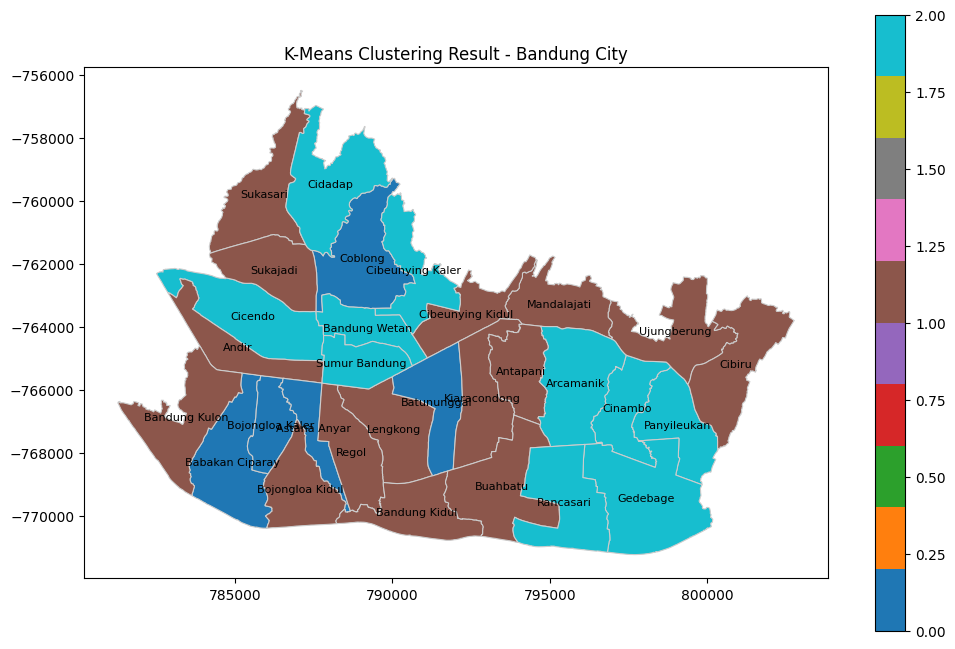

In [ ]:
kab2 = kab2.to_crs(epsg=32648)
kab2['X'] = kab2.geometry.centroid.x
kab2['Y'] = kab2.geometry.centroid.y
# Membuat plot peta
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
kab2.plot(column='kmeans_3', cmap='tab10', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Menambahkan teks untuk setiap kecamatan
for x, y, kecamatan in zip(kab2['X'], kab2['Y'], kab2['Kecamatan']):
    ax.text(x, y, kecamatan, fontsize=8, ha='center', va='center')
plt.title('K-Means Clustering Result - Bandung City')
plt.show()


In [ ]:
print(kab2.columns)


Index(['KODE_KEC', 'Kecamatan', 'geometry', 'Jumlah Kasus Baru TB BTA +',
       'Jumlah Kasus TB Anak', 'kmeans_3', 'X', 'Y'],
      dtype='object')
